In [146]:
!pip install numpy pandas scikit-learn matplotlib seaborn

In [168]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [169]:
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [170]:
print(df.head())
print(df.info())
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

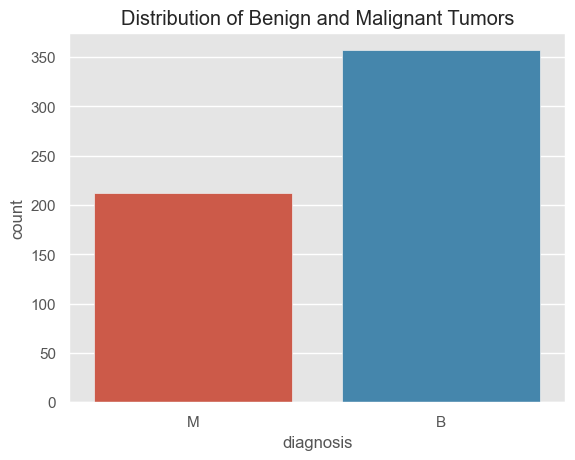

In [171]:
# Data Visualization
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Benign and Malignant Tumors')
plt.show()

In [172]:
# Encoding the target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [173]:
# Splitting the data
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])  # Dropping unnecessary columns
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[68  3]
 [ 3 40]]


In [176]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

Random Forest Classifier Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[70  1]
 [ 3 40]]


In [177]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred = np.where(lr_pred > 0.5, 1, 0)  # Convert to binary classification
print("Linear Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

Linear Regression Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[70  1]
 [ 4 39]]


In [178]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

Decision Tree Classifier Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[68  3]
 [ 3 40]]


In [179]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))
print(confusion_matrix(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[70  1]
 [ 2 41]]


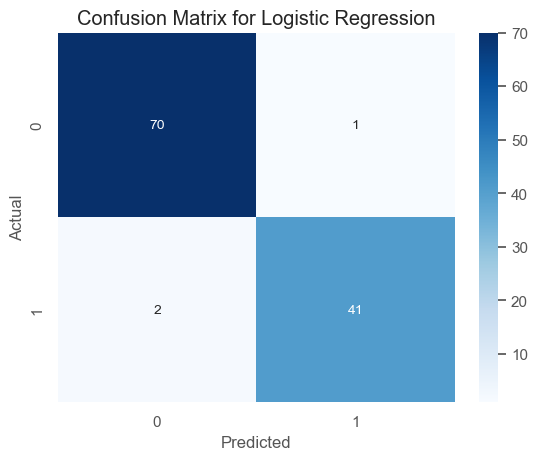

In [180]:
# Visualizing Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

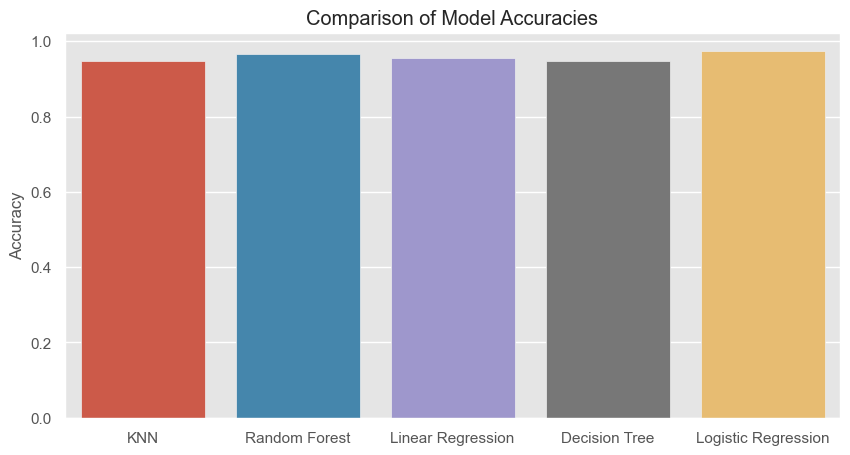

In [181]:
# Comparing Models
models = ['KNN', 'Random Forest', 'Linear Regression', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_score(y_test, knn_pred),
              accuracy_score(y_test, rf_pred),
              accuracy_score(y_test, lr_pred),
              accuracy_score(y_test, dt_pred),
              accuracy_score(y_test, log_reg_pred)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()